# Data exploration

When conducting a data analysis / mining project it is essential that one has an understanding of how collected data can be most effectively used to gain insights and knowledge relative to business objectives.  Data exploration is an iterative process that should be revisited after making adjustments to data (processing / transformations), after building initial models (validate assumptions), etc.  

### Some goals of data exploration

- select key variables
- explore relations between variables
- identify required data transformations
- validate model assumptions

In [2]:
# System imports
import gzip
import pickle

# third party import
import pandas as pd
import matplotlib.pyplot as plt

Setup Visualization framework

In [3]:
# display charts within juniper notebooks
%matplotlib inline 
plt.style.use('ggplot') 
fig1 = plt.figure()

Set Pandas display options

In [4]:
# set dsiplay format to remove scientific notation to make everything easier to read
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Load compressed data into Pandas dataframe

In [5]:
fp=gzip.open(r'resources\data\IBMWatson_followers_entities.pkl.gz','rb') # This assumes that primes.data is already packed with gzip
df = pickle.load(fp)
fp.close()

### First lets look at what the current set of profile features we have available

In [6]:
df.columns

Index(['blocked_by', 'blocking', 'contributors_enabled', 'created_at',
       'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'follow_request_sent', 'followers_count',
       'following', 'friends_count', 'geo_enabled', 'has_extended_profile',
       'id', 'id_str', 'is_translation_enabled', 'is_translator', 'lang',
       'listed_count', 'live_following', 'location', 'muting', 'name',
       'notifications', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_banner_url', 'profile_image_url',
       'profile_image_url_https', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image', 'protected',
       'screen_name', 'statuses_count', 'time_zone', 'translator_type', 'url',
       'utc_offset', 'verified', 'description_entities'],
      dtype='object')

### Some of the interesting features are:
decription, followers_count, friends_count, lang, location, name, statuses_count, description_entities

In [8]:
# When called on a DataFrame, describe generates various summary statistics, excluding NaN values.
df.describe()

,favourites_count,followers_count,friends_count,id,listed_count,statuses_count,utc_offset
count,152790.000,152790.000,152790.000,152790.000,152790.000,152790.000,92328.000
mean,908.007,1640.123,1166.809,56162242897149584.000,46.976,2578.942,-8789.310
std,5842.910,33009.746,12177.732,197346215690502880.000,280.176,14237.006,18209.909
min,0.000,0.000,0.000,12.000,0.000,0.000,-39600.000
25%,4.000,27.000,114.000,100502821.750,0.000,22.000,-21600.000
50%,37.000,111.000,356.000,473653893.000,3.000,197.000,-18000.000
75%,293.000,378.000,1026.000,2689719719.000,19.000,1189.000,3600.000
max,449170.000,4727723.000,3117511.000,809434462425640960.000,26821.000,1236368.000,46800.000


### Lets take a look at followers

In [9]:
# Describe can also be called on a Series (DataFrame column)
# Describe allows various parameters to control what stats are generated
# Pass a list of float values to set which percentiles to display
df.followers_count.describe(percentiles=[0,.25,.5,.75,.85,.90,.95,.99,.999])

count    152790.000
mean       1640.123
std       33009.746
min           0.000
0%            0.000
25%          27.000
50%         111.000
75%         378.000
85%         707.000
90%        1097.000
95%        2259.000
99%       17530.300
99.9%    209921.739
max     4727723.000
Name: followers_count, dtype: float64

In [10]:
# len -> a function that returns the length of a object, 
# when called on a Pandas Series will return the number of elements in the list
# DataFrames allow for boolean indexing, we can pass an expression that will be called on each element in the series 
len(df[df.followers_count > 2259])

7639

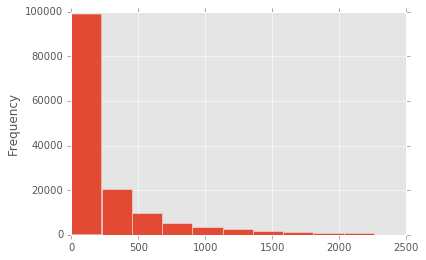

In [11]:
# pandas provides easy plotting through matplotlib
# for example to display the histogram of followers_count we do:
df[df.followers_count < 2259].followers_count.plot.hist()

In [12]:
# What does this do?
df[df.followers_count > 1000000].head()

,blocked_by,blocking,contributors_enabled,created_at,default_profile,default_profile_image,description,favourites_count,follow_request_sent,followers_count,...,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified,description_entities
738,False,False,False,Thu Sep 24 15:31:23 +0000 2009,False,False,Entrepreneur and connector. Founder of @Due I ...,10481,False,1229130,...,True,False,johnrampton,14780,Mountain Time (US & Canada),none,http://www.johnrampton.com,-25200.000,True,"{""url"": """", ""entities"": [{""text"": ""Founder"", ""..."
2726,False,False,False,Tue Apr 21 14:43:32 +0000 2009,False,False,Entertainment Mogul |Award Winning YouTube Art...,9105,False,4220500,...,True,False,6BillionPeople,177297,Central Time (US & Canada),regular,https://www.youtube.com/channel/UCOXi3v4qlMagg...,-21600.000,True,"{""url"": """", ""entities"": [{""text"": ""YouTube"", ""..."
5152,False,False,False,Tue Oct 13 02:47:15 +0000 2009,False,False,CEO No Limit East. Award winning music produce...,101,False,1047059,...,False,False,nine_oh,1236368,Central Time (US & Canada),regular,http://nineoh.us,-21600.000,True,"{""url"": """", ""entities"": [{""text"": ""CEO"", ""type..."
8486,False,False,False,Tue Jul 31 19:36:19 +0000 2012,True,False,Trained Hero Service Dog/Search & Rescue/Cadav...,114296,False,1820579,...,True,False,MaggieHeroDog,5598,Eastern Time (US & Canada),none,None,-18000.000,False,"{""url"": """", ""entities"": [{""text"": ""Golf"", ""typ..."
15991,False,False,False,Wed May 23 22:50:33 +0000 2007,False,False,OAKLANDFIGHTCLUB IIIXX OPUS #WeGottaDoBetter #...,30617,False,3710090,...,True,False,MCHammer,62650,Pacific Time (US & Canada),none,None,-28800.000,True,"{""url"": """", ""entities"": [{""text"": ""#WeGottaDoB..."


In [13]:
df[df.followers_count > 1000000][['name', 'description', 'url']]

,name,description,url
738,John Rampton,Entrepreneur and connector. Founder of @Due I ...,http://www.johnrampton.com
2726,MarQuis Trill,Entertainment Mogul |Award Winning YouTube Art...,https://www.youtube.com/channel/UCOXi3v4qlMagg...
5152,Producer 9-0🎧🎶👉,CEO No Limit East. Award winning music produce...,http://nineoh.us
8486,MaggieHeroDog,Trained Hero Service Dog/Search & Rescue/Cadav...,None
15991,MC HAMMER,OAKLANDFIGHTCLUB IIIXX OPUS #WeGottaDoBetter #...,None
19286,Nokia,Are you ready for a new era of technology? Joi...,http://nokia.com
28113,🚶🏽jack,,None
31721,Dr. Joyce🌠,"#OnlineInternationalImageCoachingCollege, Auth...",http://www.drjoyceknudsen.com
50609,Life Facts,#LifeFacts Posting whatever I like that's true...,http://getmefamous.com
51623,Carrie Fisher,theres no room for demons when you're self pos...,http://carriefisher.com/


### Friends Count
The friends count tells us the number of Twitter accounts the user is following

In [14]:
df.friends_count.describe(percentiles=[0,.25,.5,.75,.85,.90,.95,.99,.999, .9999])

count     152790.000
mean        1166.809
std        12177.732
min            0.000
0%             0.000
25%          114.000
50%          356.000
75%         1026.000
85%         1759.000
90%         2119.000
95%         3362.000
99%         6572.770
99.9%      80312.042
100.0%    418890.086
max      3117511.000
Name: friends_count, dtype: float64

### Our max has over 3 million friends. This is most likely a spam bot, so lets attempt to remove bots 

In [15]:
# we can use boolean operator to select certain values and reference them in a new object
df1 = df[df.friends_count < 80312] 
df1[df1.followers_count > 1000000][['name', 'description']]

,name,description
15991,MC HAMMER,OAKLANDFIGHTCLUB IIIXX OPUS #WeGottaDoBetter #...
28113,🚶🏽jack,
50609,Life Facts,#LifeFacts Posting whatever I like that's true...
51623,Carrie Fisher,theres no room for demons when you're self pos...
58413,Ustream,The world's most social and scalable live vide...
68596,Verizon,Serving up America's best network 140 characte...
108637,NVIDIA,The official handle for NVIDIA. Blog: http://b...
110913,Victorious Marcus,#1RADIO-MTV-UNIVERSAL-AWARDS-SINGER/SONG-MOVIE...
116557,Bon Appétit,Where food and culture meet.
116718,PeopleSearches.com,Trying to Find People Online? Try #PeopleSearc...


Some of the users with the most followers have been removed. 
Why does this suggest that this simple form of bot detection is less then ideal?

What could we do to improve it?

In order to not get stick in analysis paralysis let's add this to our list of TODOs and continue with exploration

## Now let's take a look at some of the features we extracted using AlchemyLanguage API

In [16]:
df.description_entities.head()

0    {"url": "", "entities": [{"text": "Researcher"...
1    {"url": "", "entities": [{"text": "#communityp...
2    {"url": "", "entities": [{"text": "consultant"...
3                  url, html or text must be specified
4                  url, html or text must be specified
Name: description_entities, dtype: object

Not much help from the head function, lets try looking at a few cases

In [17]:
print(df.description[0])
print('-------')
print(df.description_entities[0])

research interest: wearable sensors, non-linear dynamics, machine learning and human-robot interaction. Doctoral Researcher @unibirmingham funded by @conacyt_mx
-------
{"url": "", "entities": [{"text": "Researcher", "type": "JobTitle", "relevance": "0.973985", "count": "1"}, {"text": "@unibirmingham", "type": "TwitterHandle", "relevance": "0.973985", "count": "1"}, {"text": "@conacyt_mx", "type": "TwitterHandle", "relevance": "0.973985", "count": "1"}], "status": "OK", "usage": "By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html", "language": "english"}


Detected a jobTitle and two TwitterHandles

In [18]:
print(df.description[1])
print('-------')
print(df.description_entities[1])

Strategist, Solutions, Speaker. Tweets: #HIT #mhealth #IoT #pophealth #cpph #MIHCP #communityparamedicine #wellbeing #InvestIN ; Wknd: #food #fashion #function
-------
{"url": "", "entities": [{"text": "#communityparamedicine", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#pophealth", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#wellbeing", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#InvestIN", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#function", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#fashion", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#mhealth", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#MIHCP", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#cpph", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#food", "type": "Hashtag", "relevance": "0.01", "count": "1"}, {"text": "#HIT", "type": "Hashtag",

Picked up all the hashtags

In [19]:
print(df.description[2])
print('-------')
print(df.description_entities[2])

Chartered Surveyor, real estate consultant, commercial and residential sectors, investment and development, MCC cricketer, failed kids soccer coach.
-------
{"url": "", "entities": [{"text": "consultant", "type": "JobTitle", "relevance": "0.33", "count": "1"}, {"text": "real estate", "type": "FieldTerminology", "relevance": "0.33", "count": "1"}, {"text": "MCC", "type": "Organization", "relevance": "0.33", "count": "1"}, {"text": "soccer", "type": "Sport", "disambiguated": {"opencyc": "http://sw.opencyc.org/concept/Mx4rvVjxhJwpEbGdrcN5Y29ycA", "dbpedia": "http://dbpedia.org/resource/Association_football", "name": "Association football", "freebase": "http://rdf.freebase.com/ns/m.02vx4"}, "relevance": "0.33", "count": "1"}], "status": "OK", "usage": "By accessing AlchemyAPI or using information generated by AlchemyAPI, you are agreeing to be bound by the AlchemyAPI Terms of Use: http://www.alchemyapi.com/company/terms.html", "language": "english"}


Another job title, some industry specific language, an organization, and a sports reference

### Based on these examples, we have  identified something very useful for our client: job titles. We also know that we have a smaller set of users with a wide follower base.  Retweets from these users will reach a wider audience. 

### Extract all the job titles.  

To do this we must perform a transformation on the description_entities column in our dataset.  Go to the transform file to see how we do this.

In [21]:
df_transformed = pd.read_json(r'resources\data\IBMWatson_followers_entities_transformed.json')

After the transformation is complete we now have access to a job_title variable.

In [23]:
df_transformed['job_title'].describe()

count     26662
unique     7903
top         CEO
freq        816
Name: job_title, dtype: object

CEO is most frequent, let's check out some other values

In [28]:
df_transformed['job_title'].value_counts()

CEO                                                                                        816
Founder                                                                                    668
Consultant                                                                                 654
Director                                                                                   633
Engineer                                                                                   593
Developer                                                                                  590
Executive                                                                                  450
developer                                                                                  406
Software Engineer                                                                          400
consultant                                                                                 385
Official                                          

### Most of our job titles have only a single entry

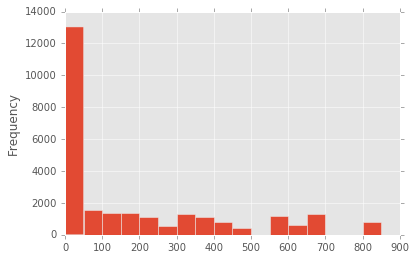

In [29]:
df_transformed['job_title_freq'] = df_transformed.groupby('job_title')['job_title'].transform('count')
df_transformed['job_title_freq'].plot.hist(bins=[_ for _ in range(0,900,50)])

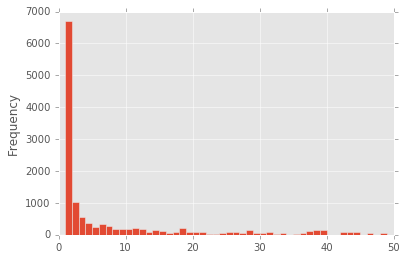

In [31]:
df_transformed['job_title_freq'].plot.hist(bins=[_ for _ in range(0,50,1)])

To create role segments we can create aggregation rules

This can be accomplished through regular expressions

In [36]:
df_transformed['job_title_new'].value_counts()[0:50]

C-Suite                     5587
developers                  2980
manager                     2538
consultants                 2241
research                    1812
director                    1796
writer/editor               1138
analyst                      701
Engineer                     593
VP                           501
education                    465
Official                     379
engineer                     313
strategists                  257
official                     224
intern                       130
Representative                79
Officer                       76
Producer                      75
security                      64
Principal                     64
producer                      46
Distinguished Engineer        44
Physicist                     42
physicist                     39
Attorney                      38
Systems Engineer              29
Sales Representative          28
Publisher                     28
attorney                      27
Marketing 

In [41]:
sum(df_transformed['job_title_new'].value_counts()[0:50])

22694

The top 50 most frequent titles account for 22,694 of job titles in the dataset (85%).

More work is required to further reduce the unique job titles in the dataset.
 - 80/20 rule

### Conclusion

During this exercise we have 
- identified useful variables (follower_count, friend_count, description)
- performed transformations (extracted job title to give us early adopter role)
- identified data problems (spam bots)

There is much more that can be done in data exploration but this is a good start to prepare us for the modeling phase where we will perform text analysis to segment the early adopters.